# Dispatch Tutorial

In this tutorial you will learn how to run a dispatch model in `osier` using
1. `osier` technology objects
2. The `osier` dispatch algorithm


First, we must import some key ingredients.

In [21]:
# basic imports
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from unyt import kW, minute, hour, day, MW

# osier imports
from osier import DispatchModel
import osier.tech_library as lib

## Creating the technology portfolio

In order to run a dispatch model you must provide a mix of energy generating technologies. The technologies used in the dispatch model should be added to a python *list*. 

In general, **dispatch models do not optimize the capacity of each generator.** They only optimize the amount of energy each generator produces (i.e., dispatches). 

If you forget what technologies are available in `osier` (or what they're called), simply look at the catalog!

In [2]:
lib.catalog()

,Import Name,Technology Name
0,battery,Battery
1,biomass,Biomass
2,coal,Coal_Conv
3,coal_adv,Coal_Adv
4,natural_gas,NaturalGas_Conv
5,natural_gas_adv,NaturalGas_Adv
6,nuclear,Nuclear
7,nuclear_adv,Nuclear_Adv
8,solar,SolarPanel
9,wind,WindTurbine


In [4]:
# create a capacity portfolio of only natural gas.

technology_mix = [lib.natural_gas]
display(technology_mix)

[NaturalGas_Conv: 8375.1331 MW]

## Adding energy demand

The other thing a dispatch model needs in order to run is a demand profile to optimize. We will create a dummy demand profile for a 48-hour period for our model to optimize.

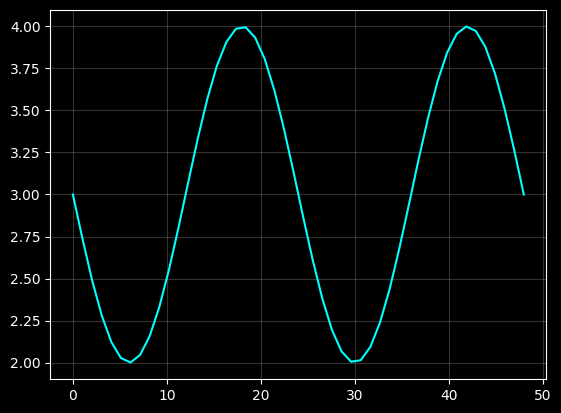

In [18]:
n_hours = 24  # hours per day
n_days = 2  # days to model
N = n_hours*n_days  # total number of time steps
phase_shift = 0  # horizontal shift [radians]
base_shift = 2  # vertical shift [units of demand]
hours = np.linspace(0,N,N)
demand = (np.sin((hours*np.pi/n_hours*2+phase_shift))*-1+np.ones(N)*(base_shift+1))

with plt.style.context("dark_background"):
    plt.plot(hours, demand, color='cyan')
    plt.grid(alpha=0.2)
    plt.show()

The demand peaks in the afternoon and reaches a minimum around 6 A.M. Although reasonable, we could make it slightly more "realistic" by adding some random noise. We can also adjust curve so the area under the curve matches a known amount of demand.

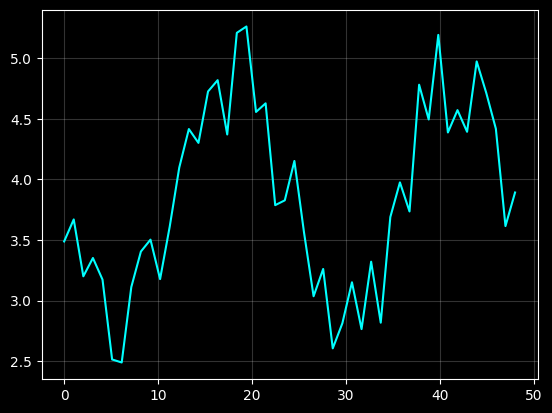

In [19]:
total_demand = 185  # sets the total demand [units of energy]

np.random.seed(1234) # sets the seed for repeatability

noise = np.random.random(N)
demand += noise

demand = demand/demand.sum() * total_demand  # rescale

with plt.style.context("dark_background"):
    plt.plot(hours, demand, color='cyan')
    plt.grid(alpha=0.2)
    plt.show()

## Creating the Dispatch Model

In [23]:
import time
start = time.perf_counter()
model = DispatchModel(technology_list=technology_mix,
                      net_demand=demand,
                      time_delta=1*hour,
                      power_units=MW,
                     )
model.solve(solver='cbc')
end = time.perf_counter()
print(model.objective)
print(end-start)

ERROR: Solver (cbc) returned non-zero return code (-6)


ApplicationError: Solver (cbc) did not exit normally